# How to configure your PASTTREC
In this notebook, the first steps to create default settings, select baselines, add small changes and upload them to FPGAs are described

In [1]:
import sys  
sys.path.insert(0, '../')

import pasttrec_ctrl as pt
import pasttrec_conf as pc
import tdc_daq

Welcome to JupyROOT 6.14/04


## Find all connected and active boards and create the default configuration for them
If tree of all connected boards is needed - use conf.genConnectedDefault() instead of conf.genActiveDefault()

PS: at the moment of writting this tutorial, the feature "set boards to standby" haven't worked - there was no change in the overview list after using it. So I was not able to test properly this python function:

In [2]:
conf = pc.Configuration(mdc_tree=pc.Helper.getConnectedMDCtree())
print(conf)

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8012	 | -- |			0x1820		|			0x1821		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|	4.00 4.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0010 0010 0010	|	0010 0010 0010 0010	|
		 | B0 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B1 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B2 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B3 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B4 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B5 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B6 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B7 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8001	 | -- |			0x1800		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|
		

For this tutorial, lets focus only on boards 0x1820 and 0x1821

In [3]:
conf = pc.Configuration(mdc_tree={"0x8012": ["0x1820", "0x1821"]})
print(conf)

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8012	 | -- |			0x1820		|			0x1821		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|	4.00 4.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0010 0010 0010	|	0010 0010 0010 0010	|
		 | B0 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B1 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B2 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B3 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B4 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B5 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B6 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B7 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|



Let start with some default configuration set for every PASTTREC

In [4]:
conf["0x1820"][0].applyDefaultConfSet(pc.ConfStorage.memory_content_map["black_settings_pt20_g1_thr127"])
conf["0x1820"][1].applyDefaultConfSet(pc.ConfStorage.memory_content_map["blue_settings_pt10_g1_thr127"])
for pasttrec in conf["0x1821"]:
    pasttrec.applyDefaultConfSet(pc.ConfStorage.memory_content_map["black_settings_pt15_g1_thr127"])
print(conf)

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8012	 | -- |			0x1820		|			0x1821		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	1.00 1.00 4.00 4.00	|	1.00 1.00 1.00 1.00	|
		 | TH |	0x7F 0x7F 0x08 0x08	|	0x7F 0x7F 0x7F 0x7F	|
		 | PT |	0020 0010 0010 0010	|	0015 0015 0015 0015	|
		 | B0 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B1 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B2 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B3 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B4 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B5 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B6 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B7 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|



Calibrate all baselines

../pasttrec_ctrl.py:544: UserWarning: No data from channel 7 of board 0x1821
  warnings.warn("No data from channel {} of board {}".format(ch,board))


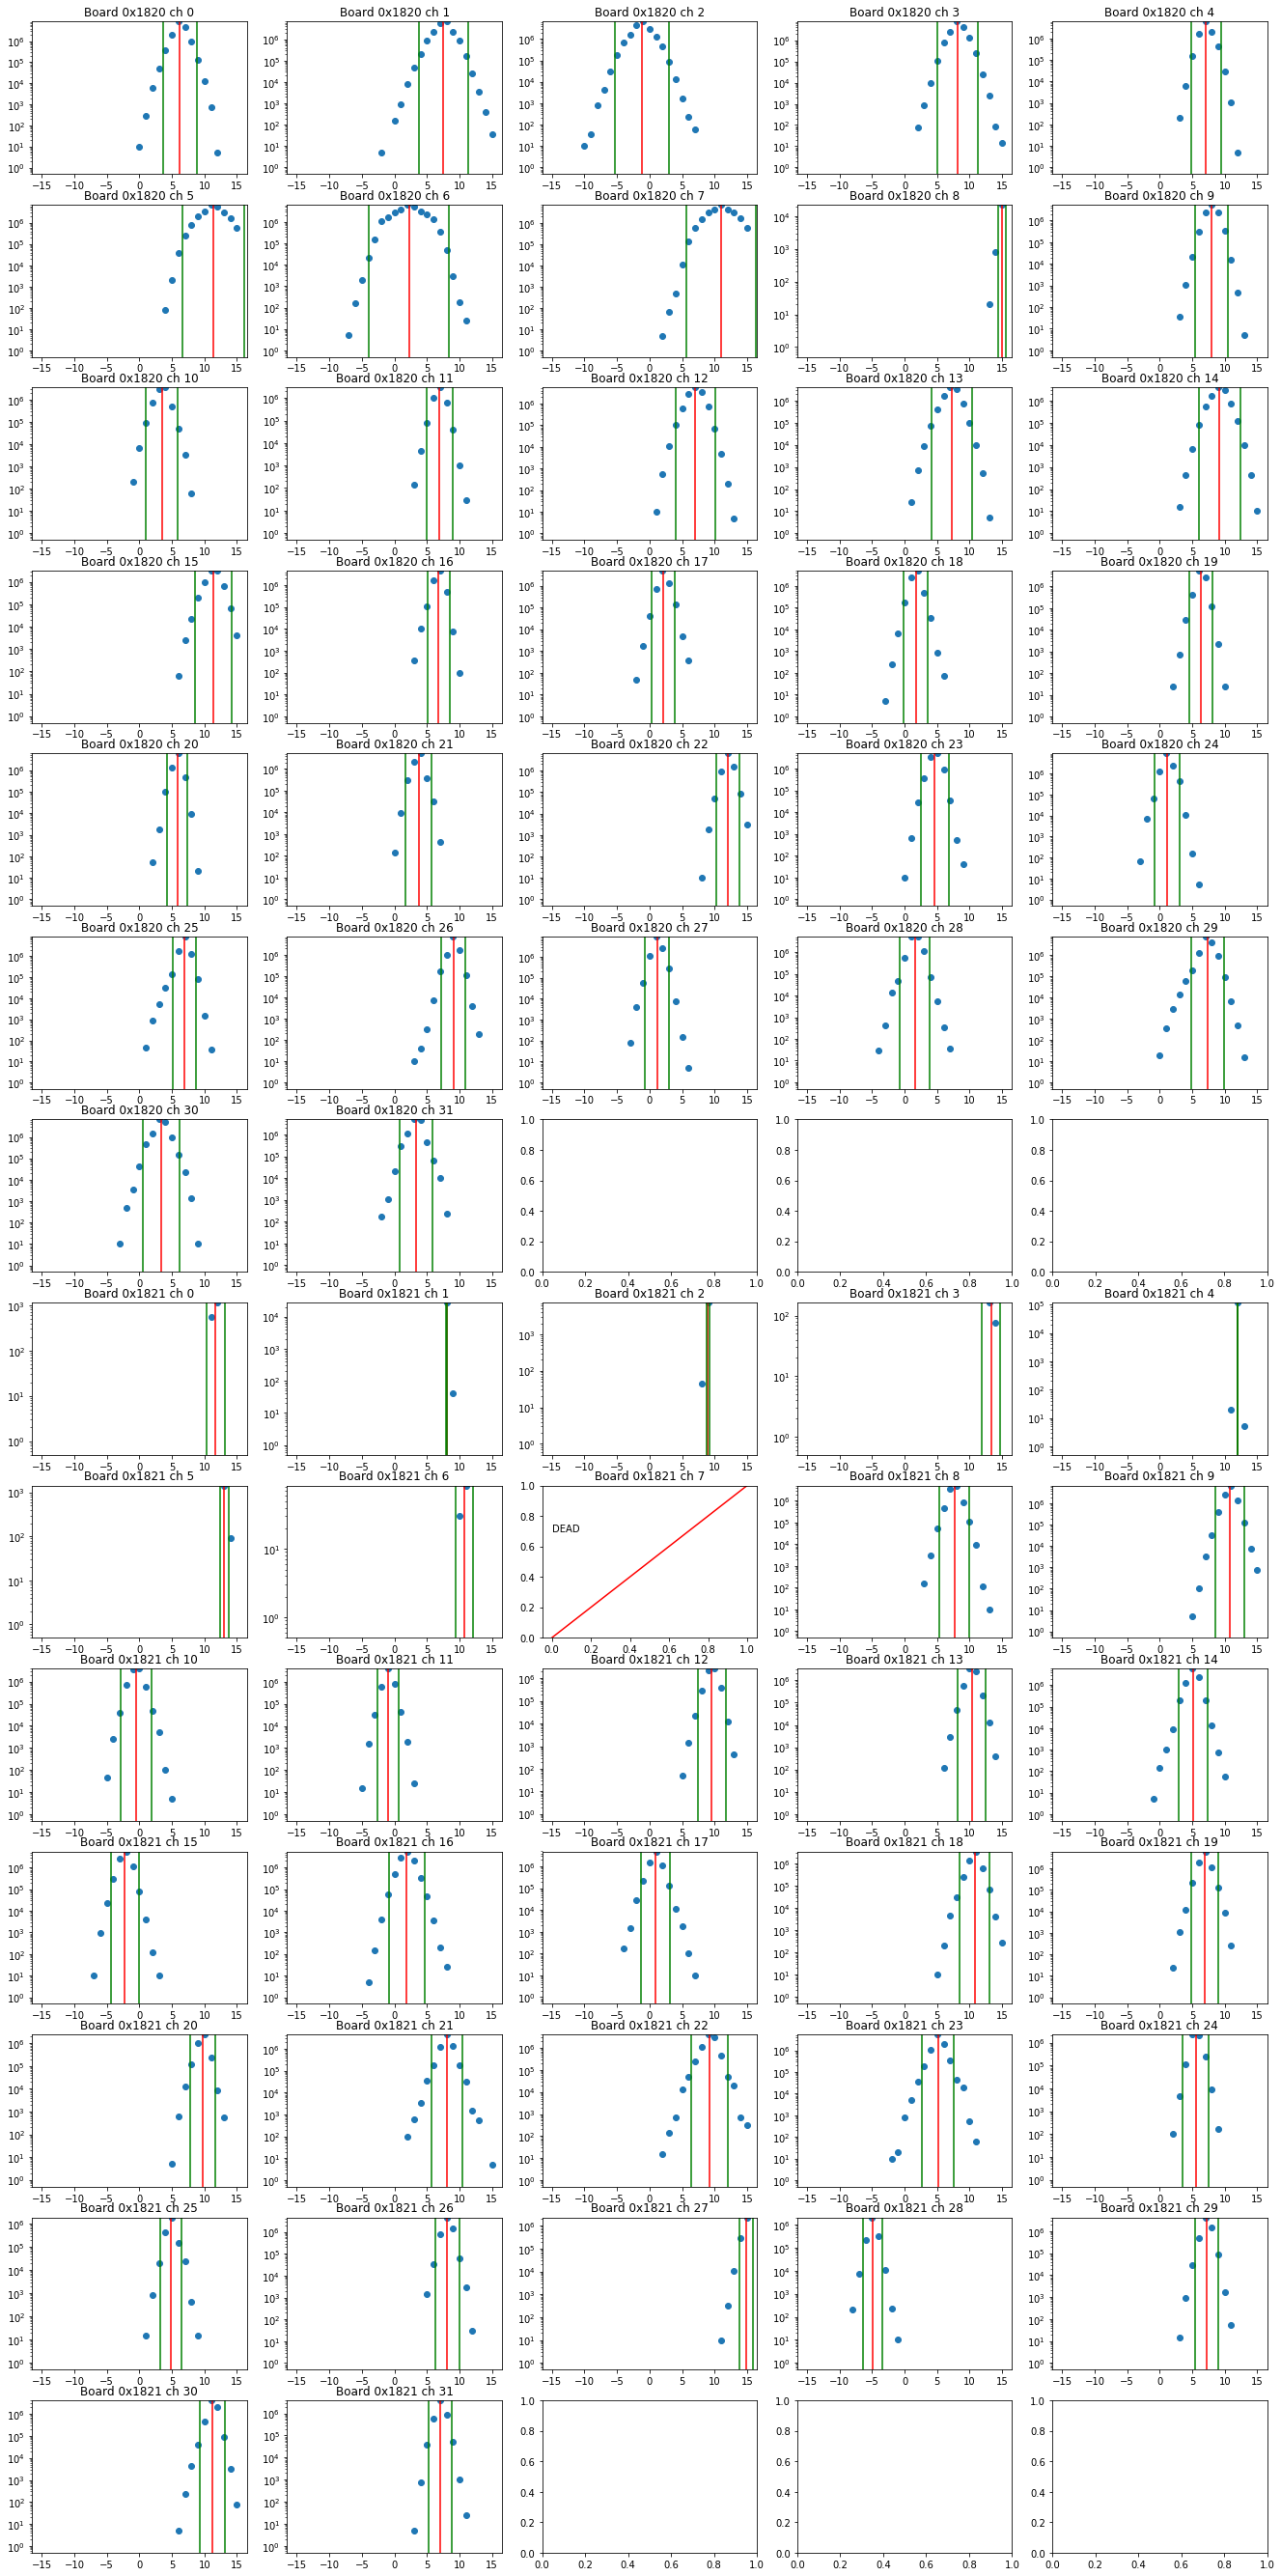

In [5]:
conf.found_all_baselines(plot=True, apply_res=False)

And change the gain and threshold for all PASTTRECs:

In [6]:
for tdc_address in conf["0x8012"].fpga:
    for pasttrec in conf[tdc_address]:
        pasttrec.setThr(0)
        pasttrec.setGain(4)

print(conf)

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8012	 | -- |			0x1820		|			0x1821		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|	4.00 4.00 4.00 4.00	|
		 | TH |	0x00 0x00 0x00 0x00	|	0x00 0x00 0x00 0x00	|
		 | PT |	0020 0010 0010 0010	|	0015 0015 0015 0015	|
		 | B0 |	0x15 0x1E 0x16 0x10	|	0x1B 0x17 0x11 0x15	|
		 | B1 |	0x17 0x17 0x11 0x16	|	0x17 0x1A 0x10 0x14	|
		 | B2 |	0x0E 0x12 0x11 0x18	|	0x18 0x0F 0x1A 0x17	|
		 | B3 |	0x17 0x16 0x15 0x10	|	0x1C 0x0E 0x16 0x1E	|
		 | B4 |	0x16 0x16 0x15 0x11	|	0x1B 0x19 0x19 0x0A	|
		 | B5 |	0x1A 0x16 0x13 0x16	|	0x1C 0x19 0x17 0x16	|
		 | B6 |	0x11 0x18 0x1B 0x12	|	0x1A 0x14 0x18 0x1A	|
		 | B7 |	0x1A 0x1A 0x14 0x12	|	0x1F 0x0D 0x14 0x16	|



Now, the time to test the configuration on real board! This commands will not change the onboard memory, so the changes will kept untill power cycle or soft reset.

In [7]:
conf.applyChanges()

To be sure, that the correct configuration was load into PASTTRECs, one can check them directly

In [8]:
print(pc.MDCTDC_FPGA.read_configuration("0x1820"))
print(pc.MDCTDC_FPGA.read_configuration("0x1821"))

FPGA 0x1820
	PASTTREC 0: gain: 4, pt: 20, thr: 0, baselines: [16, 22, 24, 16, 17, 22, 18, 18]
	PASTTREC 1: gain: 4, pt: 10, thr: 0, baselines: [16, 22, 24, 16, 17, 22, 18, 18]
	PASTTREC 2: gain: 4, pt: 10, thr: 0, baselines: [16, 22, 24, 16, 17, 22, 18, 18]
	PASTTREC 3: gain: 4, pt: 10, thr: 0, baselines: [16, 22, 24, 16, 17, 22, 18, 18]

FPGA 0x1821
	PASTTREC 0: gain: 4, pt: 15, thr: 0, baselines: [21, 20, 23, 30, 10, 22, 26, 22]
	PASTTREC 1: gain: 4, pt: 15, thr: 0, baselines: [21, 20, 23, 30, 10, 22, 26, 22]
	PASTTREC 2: gain: 4, pt: 15, thr: 0, baselines: [21, 20, 23, 30, 10, 22, 26, 22]
	PASTTREC 3: gain: 4, pt: 15, thr: 0, baselines: [21, 20, 23, 30, 10, 22, 26, 22]



If everything is ok, then create an flashable image from this configuration and upload it to the board.

In [9]:
conf.createImage( path="my_first_image")
pc.Configuration.flashImage(path="my_first_image", flash_settings="./flash_settings.pl -y")
tdc_daq.reset_trb()

Running:  ./flash_settings.pl -y 0x1820 /workdir/python_modules/past_conf_vova/my_first_image/0x8012/0x1820.hex
Running:  ./flash_settings.pl -y 0x1821 /workdir/python_modules/past_conf_vova/my_first_image/0x8012/0x1821.hex
Programming Endpoint(s) @ Address 0x1820
Symbols:
  E: Erasing
  P: Programming
  @: Success
  .: Skipped

Block: 0 1 2 3 4 5 6 7 8 9 A B C D E F
0      . . . . . . . . . . . . . . . . 
1      . . . . . . . . . . . . . . . . 
2      . . . . . . . . . . . . . . . . 
3      @ . . . . . . . . . . . . . . . 

Success

page 0/3 verified
page 1/3 verified
page 2/3 verified
page 3/3 verified
Programming Endpoint(s) @ Address 0x1821
Symbols:
  E: Erasing
  P: Programming
  @: Success
  .: Skipped

Block: 0 1 2 3 4 5 6 7 8 9 A B C D E F
0      . . . . . . . . . . . . . . . . 
1      . . . . . . . . . . . . . . . . 
2      . . . . . . . . . . . . . . . . 
3      @ . . . . . . . . . . . . . . . 

Success

page 0/3 verified
page 1/3 verified
page 2/3 verified
page 3/3 verified


Found 1 Endpoint(s) of group MDC TDC
Start programming ImageFile '/tmp/tmp.2MRgUeU9QO'
Found 1 Endpoint(s) of group MDC TDC
Start programming ImageFile '/tmp/tmp.hlL2sWZXk6'
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not reached
>ERROR: set_address failed: Endpoint not r